# Trabalho 1
Matéria: Processamento de Linguagem Natural <br>
Dupla/Matrícula: Bianca Nunes Coelho - 15102880, Raíssa Nunes Coelho - 15102887 <br> 

## Introdução

Multi Class Classification <br>

## Bibliotecas
Bibliotecas do ptyhon utilizadas neste trabalho estão a seguir.

In [175]:
import pandas as pd
import re
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt

## Datasets
Datasets utilizados estão definidos a seguir.

In [176]:
file = "train-00000-of-00001-ecf072e7202447d8.parquet"
df = pd.read_parquet(file, engine= 'pyarrow')

In [177]:
len(df)

3877

In [178]:
df.head(4)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,"Após tempestade com ventos, São Paulo terá sáb...",Após uma tempestade com ventos de mais de 100 ...,https://www.cnnbrasil.com.br/nacional/apos-tem...,"Termômetros devem chegar a 26ºC, esquentando a...",nacional,2023-11-04 12:15:44
2,Como os aplicativos de relacionamento “arruina...,Jenny Nguyen-Don estava com vontade de comer f...,https://www.cnnbrasil.com.br/tecnologia/como-o...,Pessoas em busca de relacionamentos afirmam qu...,tecnologia,2023-11-04 12:15:07
3,Fluminense pode ser o 26º clube a levantar a t...,O Fluminense vai em busca do primeiro título d...,https://www.cnnbrasil.com.br/esportes/fluminen...,"Em busca do título inédito, o Tricolor carioca...",esportes,2023-11-04 12:05:24


## Balanceamento

In [179]:
df['categoria'].value_counts()

esportes           960
nacional           623
internacional      618
economia           562
politica           507
entretenimento     450
tecnologia          44
saude               41
noticias            38
lifestyle           21
branded-content     13
Name: categoria, dtype: int64

<AxesSubplot: >

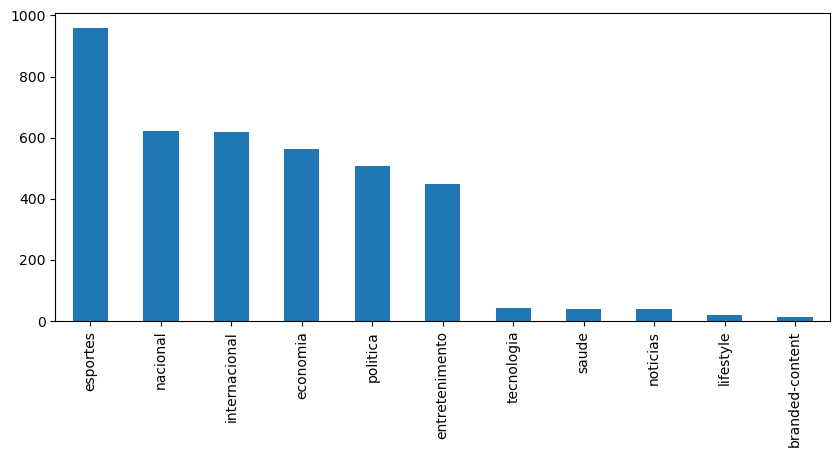

In [180]:
plt.figure(figsize=(10,4))
df.categoria.value_counts().plot(kind='bar')

In [181]:
indice_linha_remover = ['tecnologia',  'saude','noticias','lifestyle','branded-content']

In [182]:
df = df[~df['categoria'].isin(indice_linha_remover)]

In [183]:
df['categoria'].value_counts()

esportes          960
nacional          623
internacional     618
economia          562
politica          507
entretenimento    450
Name: categoria, dtype: int64

In [184]:
# Undersampling
min = df['categoria'].value_counts().min()

amostras = []

for i in df['categoria'].value_counts().index:
    a = df[df['categoria'] == i].sample(min, replace=False)
    amostras.append(a)

df_balanceado = pd.concat(amostras)

In [185]:
df_balanceado['categoria'].value_counts()

esportes          450
nacional          450
internacional     450
economia          450
politica          450
entretenimento    450
Name: categoria, dtype: int64

In [186]:
df_balanceado = df_balanceado.reset_index(drop=True)
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,Santos tem chances remotas de jogar a Copa do ...,O Santos ainda tem chances de disputar a Copa ...,https://www.cnnbrasil.com.br/esportes/santos-t...,Peixe precisaria ser o melhor time fora da zon...,esportes,2023-11-16 18:59:30
2,Flamengo fará jogo no Pará pelo Campeonato Car...,A Secretaria de Esporte e Lazer (Seel) do Pará...,https://www.cnnbrasil.com.br/esportes/flamengo...,Clube vai encarar um rival a ser definido por ...,esportes,2023-11-16 19:09:32
3,Joel Santana defende Leila e detona Abel Ferre...,"Joel Santana, histórico técnico brasileiro, fe...",https://www.cnnbrasil.com.br/esportes/joel-san...,Técnico criticou a postura do português e defe...,esportes,2023-11-08 19:19:26
4,"Após polêmica, Kajuru se desculpa com torcida ...","O senador Jorge Kajuru (PSB-GO) pediu, nesta s...",https://www.cnnbrasil.com.br/esportes/apos-pol...,Senador xingou jogadores depois de vitória sob...,esportes,2023-11-27 19:21:15


In [187]:
df_balanceado2 = df_balanceado.copy()
df_balanceado3 = df_balanceado.copy()

In [188]:
df_balanceado2.head()

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,Santos tem chances remotas de jogar a Copa do ...,O Santos ainda tem chances de disputar a Copa ...,https://www.cnnbrasil.com.br/esportes/santos-t...,Peixe precisaria ser o melhor time fora da zon...,esportes,2023-11-16 18:59:30
2,Flamengo fará jogo no Pará pelo Campeonato Car...,A Secretaria de Esporte e Lazer (Seel) do Pará...,https://www.cnnbrasil.com.br/esportes/flamengo...,Clube vai encarar um rival a ser definido por ...,esportes,2023-11-16 19:09:32
3,Joel Santana defende Leila e detona Abel Ferre...,"Joel Santana, histórico técnico brasileiro, fe...",https://www.cnnbrasil.com.br/esportes/joel-san...,Técnico criticou a postura do português e defe...,esportes,2023-11-08 19:19:26
4,"Após polêmica, Kajuru se desculpa com torcida ...","O senador Jorge Kajuru (PSB-GO) pediu, nesta s...",https://www.cnnbrasil.com.br/esportes/apos-pol...,Senador xingou jogadores depois de vitória sob...,esportes,2023-11-27 19:21:15


In [189]:
df_balanceado3.head()

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,Santos tem chances remotas de jogar a Copa do ...,O Santos ainda tem chances de disputar a Copa ...,https://www.cnnbrasil.com.br/esportes/santos-t...,Peixe precisaria ser o melhor time fora da zon...,esportes,2023-11-16 18:59:30
2,Flamengo fará jogo no Pará pelo Campeonato Car...,A Secretaria de Esporte e Lazer (Seel) do Pará...,https://www.cnnbrasil.com.br/esportes/flamengo...,Clube vai encarar um rival a ser definido por ...,esportes,2023-11-16 19:09:32
3,Joel Santana defende Leila e detona Abel Ferre...,"Joel Santana, histórico técnico brasileiro, fe...",https://www.cnnbrasil.com.br/esportes/joel-san...,Técnico criticou a postura do português e defe...,esportes,2023-11-08 19:19:26
4,"Após polêmica, Kajuru se desculpa com torcida ...","O senador Jorge Kajuru (PSB-GO) pediu, nesta s...",https://www.cnnbrasil.com.br/esportes/apos-pol...,Senador xingou jogadores depois de vitória sob...,esportes,2023-11-27 19:21:15


In [190]:
# pega coluna
text = df_balanceado['texto'] # para NLTK
text2 = df_balanceado2['texto'] # para spaCy
text3 = df_balanceado3['texto'] # para Gensim
len(text)

2700

In [191]:
text[0]

'Se tem um treinador que sempre foi badalado pela forma como faz seu time jogar, este cara é Fernando Diniz. E o comandante do Fluminense tem a chance de chegar ao ápice da carreira neste sábado (4), a partir das 17h (de Brasília), quando decide a Copa Libertadores contra o Boca Juniors-ARG, no Maracanã. Rumo à Glória Eterna. E sua glória pessoal. Considerado há alguns anos um dos melhores – senão o melhor – técnico do futebol brasileiro, Fernando Diniz sempre esbarra na desconfiança que o persegue. Uma desconfiança “resultadista”. Afinal, como pode um treinador tão elogiado ter apenas um Campeonato Carioca (2023) na bagagem? Títulos de expressão e Diniz, até então, pareciam não combinar.  Leia mais  Certo é que a final da Copa Libertadores já vai alçar o técnico a outro patamar. Mesmo sendo interino na Seleção Brasileira, conquistar o maior torneio de clubes da América do Sul terá um valor inestimável. Além de entrar na galeria da fama do Fluminense, o treinador tricolor dará uma resp

In [192]:
categorias = ['esportes','nacional', 'internacional', 'economia', 'politica', 'entretenimento']

## Pré-processamento

### NLTK

In [193]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [194]:
from unidecode import unidecode

for i in range(len(text)):
    text[i] = unidecode(text[i])

In [195]:
for i in range(len(text)):
    text[i] = re.sub(r'[^a-zA-Z\s]', "" ,text[i])

In [196]:
print(text[0])

se tem um treinador que sempre foi badalado pela forma como faz seu time jogar este cara e fernando diniz e o comandante do fluminense tem a chance de chegar ao apice da carreira neste sabado  a partir das h de brasilia quando decide a copa libertadores contra o boca juniorsarg no maracana rumo a gloria eterna e sua gloria pessoal considerado ha alguns anos um dos melhores  senao o melhor  tecnico do futebol brasileiro fernando diniz sempre esbarra na desconfianca que o persegue uma desconfianca resultadista afinal como pode um treinador tao elogiado ter apenas um campeonato carioca  na bagagem titulos de expressao e diniz ate entao pareciam nao combinar  leia mais  certo e que a final da copa libertadores ja vai alcar o tecnico a outro patamar mesmo sendo interino na selecao brasileira conquistar o maior torneio de clubes da america do sul tera um valor inestimavel alem de entrar na galeria da fama do fluminense o treinador tricolor dara uma resposta aos criticos diniz pode enfim atin

In [197]:
token_text = []

for j in text:
    token_text.append(nltk.word_tokenize(j))

In [198]:
print(token_text[0])

['se', 'tem', 'um', 'treinador', 'que', 'sempre', 'foi', 'badalado', 'pela', 'forma', 'como', 'faz', 'seu', 'time', 'jogar', 'este', 'cara', 'e', 'fernando', 'diniz', 'e', 'o', 'comandante', 'do', 'fluminense', 'tem', 'a', 'chance', 'de', 'chegar', 'ao', 'apice', 'da', 'carreira', 'neste', 'sabado', 'a', 'partir', 'das', 'h', 'de', 'brasilia', 'quando', 'decide', 'a', 'copa', 'libertadores', 'contra', 'o', 'boca', 'juniorsarg', 'no', 'maracana', 'rumo', 'a', 'gloria', 'eterna', 'e', 'sua', 'gloria', 'pessoal', 'considerado', 'ha', 'alguns', 'anos', 'um', 'dos', 'melhores', 'senao', 'o', 'melhor', 'tecnico', 'do', 'futebol', 'brasileiro', 'fernando', 'diniz', 'sempre', 'esbarra', 'na', 'desconfianca', 'que', 'o', 'persegue', 'uma', 'desconfianca', 'resultadista', 'afinal', 'como', 'pode', 'um', 'treinador', 'tao', 'elogiado', 'ter', 'apenas', 'um', 'campeonato', 'carioca', 'na', 'bagagem', 'titulos', 'de', 'expressao', 'e', 'diniz', 'ate', 'entao', 'pareciam', 'nao', 'combinar', 'leia',

In [199]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hworld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [204]:
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

In [205]:
for stop in sw:
    for text in token_text:
        for t in text:
            if(t == stop):
                text.remove(t)

In [202]:
print(token_text[0])

['treinador', 'sempre', 'badalado', 'forma', 'faz', 'time', 'jogar', 'cara', 'fernando', 'diniz', 'comandante', 'fluminense', 'chance', 'chegar', 'apice', 'carreira', 'neste', 'sabado', 'partir', 'h', 'brasilia', 'decide', 'copa', 'libertadores', 'contra', 'boca', 'juniorsarg', 'maracana', 'rumo', 'gloria', 'eterna', 'gloria', 'pessoal', 'considerado', 'ha', 'alguns', 'anos', 'melhores', 'senao', 'melhor', 'tecnico', 'futebol', 'brasileiro', 'fernando', 'diniz', 'sempre', 'esbarra', 'desconfianca', 'persegue', 'desconfianca', 'resultadista', 'afinal', 'pode', 'treinador', 'tao', 'elogiado', 'ter', 'apenas', 'campeonato', 'carioca', 'bagagem', 'titulos', 'expressao', 'diniz', 'ate', 'entao', 'pareciam', 'nao', 'combinar', 'leia', 'certo', 'final', 'copa', 'libertadores', 'ja', 'vai', 'alcar', 'tecnico', 'outro', 'patamar', 'sendo', 'interino', 'selecao', 'brasileira', 'conquistar', 'maior', 'torneio', 'clubes', 'america', 'sul', 'tera', 'valor', 'inestimavel', 'alem', 'entrar', 'galeria

In [206]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...","[treinador, sempre, badalado, forma, faz, time...",https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,Santos tem chances remotas de jogar a Copa do ...,"[santos, ainda, chances, disputar, copa, brasi...",https://www.cnnbrasil.com.br/esportes/santos-t...,Peixe precisaria ser o melhor time fora da zon...,esportes,2023-11-16 18:59:30


### spaCy

In [207]:
for i in range(len(text2)):
    text2[i] = text2[i].lower()

In [208]:
from unidecode import unidecode

for i in range(len(text2)):
    text2[i] = unidecode(text2[i])

In [209]:
for i in range(len(text2)):
   text2[i] = re.sub(r'[^a-zA-Z\s]', "" ,text2[i])

In [210]:
print(text2[0])

se tem um treinador que sempre foi badalado pela forma como faz seu time jogar este cara e fernando diniz e o comandante do fluminense tem a chance de chegar ao apice da carreira neste sabado  a partir das h de brasilia quando decide a copa libertadores contra o boca juniorsarg no maracana rumo a gloria eterna e sua gloria pessoal considerado ha alguns anos um dos melhores  senao o melhor  tecnico do futebol brasileiro fernando diniz sempre esbarra na desconfianca que o persegue uma desconfianca resultadista afinal como pode um treinador tao elogiado ter apenas um campeonato carioca  na bagagem titulos de expressao e diniz ate entao pareciam nao combinar  leia mais  certo e que a final da copa libertadores ja vai alcar o tecnico a outro patamar mesmo sendo interino na selecao brasileira conquistar o maior torneio de clubes da america do sul tera um valor inestimavel alem de entrar na galeria da fama do fluminense o treinador tricolor dara uma resposta aos criticos diniz pode enfim atin

In [211]:
nlp = spacy.load('pt_core_news_sm')

doc = []

for j in text2:
    temp = nlp(j)
    doc.append(temp)
print(doc[0])

se tem um treinador que sempre foi badalado pela forma como faz seu time jogar este cara e fernando diniz e o comandante do fluminense tem a chance de chegar ao apice da carreira neste sabado  a partir das h de brasilia quando decide a copa libertadores contra o boca juniorsarg no maracana rumo a gloria eterna e sua gloria pessoal considerado ha alguns anos um dos melhores  senao o melhor  tecnico do futebol brasileiro fernando diniz sempre esbarra na desconfianca que o persegue uma desconfianca resultadista afinal como pode um treinador tao elogiado ter apenas um campeonato carioca  na bagagem titulos de expressao e diniz ate entao pareciam nao combinar  leia mais  certo e que a final da copa libertadores ja vai alcar o tecnico a outro patamar mesmo sendo interino na selecao brasileira conquistar o maior torneio de clubes da america do sul tera um valor inestimavel alem de entrar na galeria da fama do fluminense o treinador tricolor dara uma resposta aos criticos diniz pode enfim atin

In [212]:
token_text2 = []

#Creating and updating our list of tokens using list comprehension 
for i in range(len(text2)):
    temp = [token.text for token in doc[i]]
    token_text2.append(temp)

print(token_text2[0])

['se', 'tem', 'um', 'treinador', 'que', 'sempre', 'foi', 'badalado', 'pela', 'forma', 'como', 'faz', 'seu', 'time', 'jogar', 'este', 'cara', 'e', 'fernando', 'diniz', 'e', 'o', 'comandante', 'do', 'fluminense', 'tem', 'a', 'chance', 'de', 'chegar', 'ao', 'apice', 'da', 'carreira', 'neste', 'sabado', ' ', 'a', 'partir', 'das', 'h', 'de', 'brasilia', 'quando', 'decide', 'a', 'copa', 'libertadores', 'contra', 'o', 'boca', 'juniorsarg', 'no', 'maracana', 'rumo', 'a', 'gloria', 'eterna', 'e', 'sua', 'gloria', 'pessoal', 'considerado', 'ha', 'alguns', 'anos', 'um', 'dos', 'melhores', ' ', 'senao', 'o', 'melhor', ' ', 'tecnico', 'do', 'futebol', 'brasileiro', 'fernando', 'diniz', 'sempre', 'esbarra', 'na', 'desconfianca', 'que', 'o', 'persegue', 'uma', 'desconfianca', 'resultadista', 'afinal', 'como', 'pode', 'um', 'treinador', 'tao', 'elogiado', 'ter', 'apenas', 'um', 'campeonato', 'carioca', ' ', 'na', 'bagagem', 'titulos', 'de', 'expressao', 'e', 'diniz', 'ate', 'entao', 'pareciam', 'nao',

In [213]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop = STOP_WORDS
print(stop)

{'vens', 'vinda', 'adeus', 'iniciar', 'porque', 'aquele', 'sou', 'diz', 'porquê', 'assim', 'tive', 'possível', 'tivemos', 'têm', 'podia', 'é', 'muitos', 'pelo', 'dar', 'você', 'outros', 'essas', 'estiveste', 'através', 'catorze', 'vossas', 'dezoito', 'estará', 'quinto', 'quieto', 'alguns', 'daquela', 'menos', 'ora', 'tivestes', 'sexta', 'vêm', 'vai', 'aí', 'usa', 'quatro', 'que', 'novos', 'nunca', 'querem', 'sois', 'área', 'algo', 'seis', 'tal', 'sexto', 'possivelmente', 'és', 'des', 'diante', 'momento', 'longe', 'aqui', 'tiveste', 'direita', 'mês', 'sobre', 'oitavo', 'uns', 'mil', 'menor', 'maioria', 'fará', 'quarto', 'porquanto', 'vosso', 'seria', 'fez', 'de', 'aqueles', 'sistema', 'ademais', 'fui', 'bem', 'um', 'nada', 'saber', 'cujo', 'dentro', 'forma', 'tudo', 'estiveram', 'nós', 'põem', 'dessa', 'pegar', 'pois', 'toda', 'aos', 'dá', 'tentar', 'breve', 'último', 'meu', 'elas', 'talvez', 'oito', 'poder', 'quem', 'enquanto', 'tem', 'ver', 'dizem', 'próximo', 'nuns', 'quer', 'comprid

In [214]:
token2 = []
for i in token_text2:
    temp = []
    for token in i:
        if token not in stop:
            temp.append(token)
    token2.append(temp)
print(token2[0])

['treinador', 'badalado', 'time', 'jogar', 'cara', 'fernando', 'diniz', 'comandante', 'fluminense', 'chance', 'chegar', 'apice', 'carreira', 'sabado', ' ', 'h', 'brasilia', 'decide', 'copa', 'libertadores', 'boca', 'juniorsarg', 'maracana', 'rumo', 'gloria', 'eterna', 'gloria', 'pessoal', 'considerado', 'ha', 'anos', 'melhores', ' ', 'senao', 'melhor', ' ', 'tecnico', 'futebol', 'brasileiro', 'fernando', 'diniz', 'esbarra', 'desconfianca', 'persegue', 'desconfianca', 'resultadista', 'afinal', 'treinador', 'tao', 'elogiado', 'campeonato', 'carioca', ' ', 'bagagem', 'titulos', 'expressao', 'diniz', 'ate', 'entao', 'pareciam', 'nao', 'combinar', ' ', 'leia', ' ', 'certo', 'copa', 'libertadores', 'ja', 'alcar', 'tecnico', 'outro', 'patamar', 'sendo', 'interino', 'selecao', 'brasileira', 'conquistar', 'torneio', 'clubes', 'america', 'sul', 'tera', 'inestimavel', 'alem', 'entrar', 'galeria', 'fama', 'fluminense', 'treinador', 'tricolor', 'dara', 'resposta', 'criticos', 'diniz', 'enfim', 'ati

In [215]:
df_balanceado2['texto'] = token2
df_balanceado2.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...","[treinador, badalado, time, jogar, cara, ferna...",https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,Santos tem chances remotas de jogar a Copa do ...,"[santos, chances, disputar, copa, brasil, , a...",https://www.cnnbrasil.com.br/esportes/santos-t...,Peixe precisaria ser o melhor time fora da zon...,esportes,2023-11-16 18:59:30


### Gensim

In [222]:
from gensim.utils import simple_preprocess
from gensim.utils import tokenize

for i in range(len(text3)):
    text3[i] = text3[i].lower()

In [223]:
from unidecode import unidecode

for i in range(len(text3)):
    text3[i] = unidecode(text3[i])

In [224]:
for i in range(len(text3)):
   text3[i] = re.sub(r'[^a-zA-Z\s]', "" ,text3[i])

In [228]:
text3[0]

'se tem um treinador que sempre foi badalado pela forma como faz seu time jogar este cara e fernando diniz e o comandante do fluminense tem a chance de chegar ao apice da carreira neste sabado  a partir das h de brasilia quando decide a copa libertadores contra o boca juniorsarg no maracana rumo a gloria eterna e sua gloria pessoal considerado ha alguns anos um dos melhores  senao o melhor  tecnico do futebol brasileiro fernando diniz sempre esbarra na desconfianca que o persegue uma desconfianca resultadista afinal como pode um treinador tao elogiado ter apenas um campeonato carioca  na bagagem titulos de expressao e diniz ate entao pareciam nao combinar  leia mais  certo e que a final da copa libertadores ja vai alcar o tecnico a outro patamar mesmo sendo interino na selecao brasileira conquistar o maior torneio de clubes da america do sul tera um valor inestimavel alem de entrar na galeria da fama do fluminense o treinador tricolor dara uma resposta aos criticos diniz pode enfim ati

In [232]:
tokens3 = []

for i in range(len(text3)):
    tokens3.append(list(tokenize(text3[i])))

print(tokens3[0])

['se', 'tem', 'um', 'treinador', 'que', 'sempre', 'foi', 'badalado', 'pela', 'forma', 'como', 'faz', 'seu', 'time', 'jogar', 'este', 'cara', 'e', 'fernando', 'diniz', 'e', 'o', 'comandante', 'do', 'fluminense', 'tem', 'a', 'chance', 'de', 'chegar', 'ao', 'apice', 'da', 'carreira', 'neste', 'sabado', 'a', 'partir', 'das', 'h', 'de', 'brasilia', 'quando', 'decide', 'a', 'copa', 'libertadores', 'contra', 'o', 'boca', 'juniorsarg', 'no', 'maracana', 'rumo', 'a', 'gloria', 'eterna', 'e', 'sua', 'gloria', 'pessoal', 'considerado', 'ha', 'alguns', 'anos', 'um', 'dos', 'melhores', 'senao', 'o', 'melhor', 'tecnico', 'do', 'futebol', 'brasileiro', 'fernando', 'diniz', 'sempre', 'esbarra', 'na', 'desconfianca', 'que', 'o', 'persegue', 'uma', 'desconfianca', 'resultadista', 'afinal', 'como', 'pode', 'um', 'treinador', 'tao', 'elogiado', 'ter', 'apenas', 'um', 'campeonato', 'carioca', 'na', 'bagagem', 'titulos', 'de', 'expressao', 'e', 'diniz', 'ate', 'entao', 'pareciam', 'nao', 'combinar', 'leia',

In [238]:
stopwords = [ 'a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]

print(stopwords)

['a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'di

In [239]:
token3 = []
for i in tokens3:
    temp = []
    for token in i:
        if token not in stopwords:
            temp.append(token)
    token3.append(temp)
print(token3[0])

['treinador', 'badalado', 'time', 'jogar', 'cara', 'fernando', 'diniz', 'comandante', 'fluminense', 'chance', 'chegar', 'apice', 'carreira', 'sabado', 'h', 'brasilia', 'decide', 'copa', 'libertadores', 'boca', 'juniorsarg', 'maracana', 'rumo', 'gloria', 'eterna', 'gloria', 'pessoal', 'considerado', 'ha', 'melhores', 'senao', 'melhor', 'tecnico', 'futebol', 'brasileiro', 'fernando', 'diniz', 'esbarra', 'desconfianca', 'persegue', 'desconfianca', 'resultadista', 'afinal', 'treinador', 'tao', 'elogiado', 'campeonato', 'carioca', 'bagagem', 'titulos', 'expressao', 'diniz', 'ate', 'entao', 'pareciam', 'nao', 'combinar', 'leia', 'certo', 'copa', 'libertadores', 'ja', 'alcar', 'tecnico', 'patamar', 'interino', 'selecao', 'brasileira', 'conquistar', 'torneio', 'clubes', 'america', 'sul', 'tera', 'valor', 'inestimavel', 'alem', 'entrar', 'galeria', 'fama', 'fluminense', 'treinador', 'tricolor', 'dara', 'resposta', 'criticos', 'diniz', 'enfim', 'atingir', 'maximo', 'chance', 'conquistar', 'ameri

In [240]:
df_balanceado3['texto'] = token3
df_balanceado3.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...","[treinador, badalado, time, jogar, cara, ferna...",https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,Santos tem chances remotas de jogar a Copa do ...,"[santos, chances, disputar, copa, brasil, apes...",https://www.cnnbrasil.com.br/esportes/santos-t...,Peixe precisaria ser o melhor time fora da zon...,esportes,2023-11-16 18:59:30


## Análises

### NLTK

In [243]:
from collections import Counter  # Contagem de frequência de palavras usando NLTK 
frequencia_palavras = Counter(token_text[0]) 
print(frequencia_palavras.most_common(10))

[('diniz', 20), ('treinador', 12), ('fernando', 11), ('fluminense', 11), ('nao', 11), ('copa', 10), ('brasileiro', 10), ('futebol', 8), ('equipe', 8), ('campeonato', 7)]


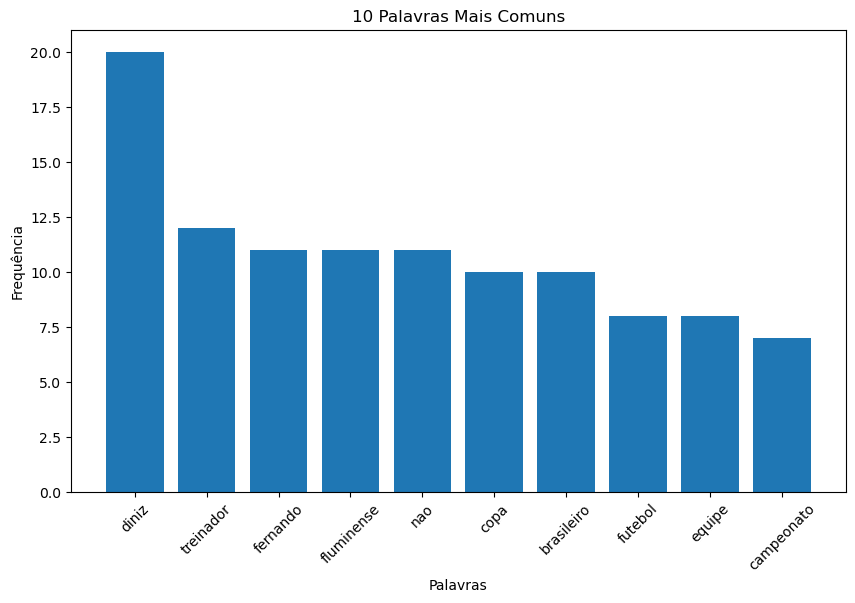

In [242]:
# Obter os 10 tokens mais comuns e suas contagens
tokens_mais_comuns = frequencia_palavras.most_common(10)
palavras, contagens = zip(*tokens_mais_comuns)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

### spaCy

In [245]:
from collections import Counter  # Contagem de frequência de palavras usando NLTK 
frequencia_palavras = Counter(token2[0]) 
print(frequencia_palavras.most_common(10))

[(' ', 33), ('diniz', 20), ('treinador', 12), ('fernando', 11), ('fluminense', 11), ('nao', 11), ('copa', 10), ('brasileiro', 10), ('futebol', 8), ('equipe', 8)]


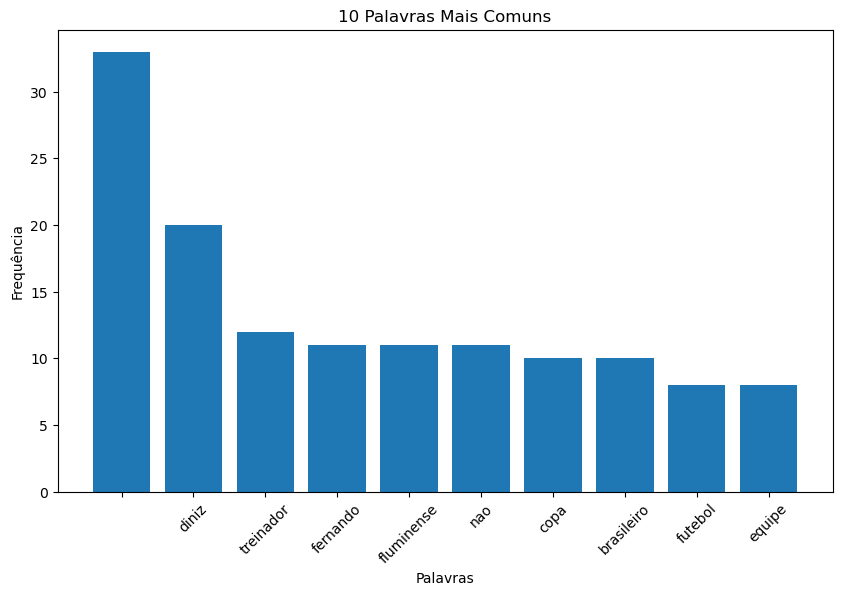

In [246]:
# Obter os 10 tokens mais comuns e suas contagens
tokens_mais_comuns = frequencia_palavras.most_common(10)
palavras, contagens = zip(*tokens_mais_comuns)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

### Gensim

In [247]:
from collections import Counter  # Contagem de frequência de palavras usando NLTK 
frequencia_palavras = Counter(token3[0]) 
print(frequencia_palavras.most_common(10))

[('diniz', 20), ('treinador', 12), ('fernando', 11), ('fluminense', 11), ('nao', 11), ('copa', 10), ('brasileiro', 10), ('futebol', 8), ('equipe', 8), ('campeonato', 7)]


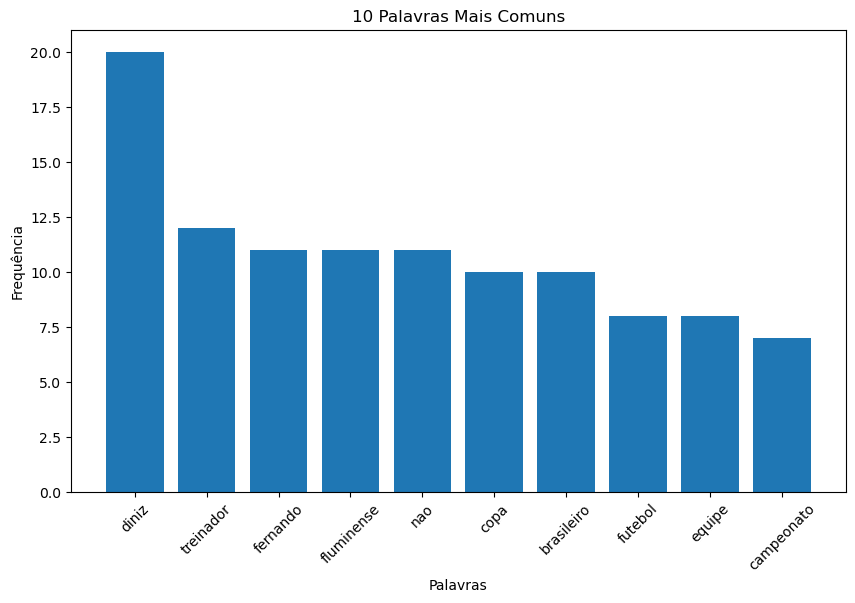

In [248]:
# Obter os 10 tokens mais comuns e suas contagens
tokens_mais_comuns = frequencia_palavras.most_common(10)
palavras, contagens = zip(*tokens_mais_comuns)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

## Prediction
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb  <br>
refazer para cada biblioteca

### NLTK

In [41]:
for i in range(len(token_text)):
    token_text[i] = " ".join(token_text[i])
print(token_text[0])

In [42]:
df_balanceado['texto'] = token_text
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Ituano x Chapecoense: tempo real e onde assist...,,https://www.cnnbrasil.com.br/esportes/ituano-x...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-17 14:20:18
1,Chelsea intensifica conversas com Gabriel Mosc...,chelsea mantem firme ideia contratar volante g...,https://www.cnnbrasil.com.br/esportes/chelsea-...,Clube paulista já recusou uma proposta dos ing...,esportes,2023-11-09 14:04:55
2,Ex-jogador Fred deita no chão após assalto no ...,camera seguranca mostrou momento exjogador fut...,https://www.cnnbrasil.com.br/esportes/ex-jogad...,Imagens de câmeras de segurança mostram três c...,esportes,2023-11-24 11:50:29
3,Esposa de Daniel Alves dá entrevista polêmica ...,esposa daniel alves preso desde janeiro suspei...,https://www.cnnbrasil.com.br/esportes/esposa-d...,"Alves foi preso no dia 20 de janeiro, pouco me...",esportes,2023-11-25 20:39:52
4,Diniz faz mistério em escalação do Fluminense ...,fernando diniz nao quis saber dar pistas sobre...,https://www.cnnbrasil.com.br/esportes/diniz-fa...,Treinador lamentou episódios ocorridos na últi...,esportes,2023-11-03 21:17:20


In [43]:
col = ['categoria', 'texto']
df_balanceado = df_balanceado[col]

In [44]:
df_balanceado.head()

,categoria,texto
0,esportes,
1,esportes,chelsea mantem firme ideia contratar volante g...
2,esportes,camera seguranca mostrou momento exjogador fut...
3,esportes,esposa daniel alves preso desde janeiro suspei...
4,esportes,fernando diniz nao quis saber dar pistas sobre...


In [45]:
df_balanceado['category_id'] = df_balanceado['categoria'].factorize()[0]
from io import StringIO
category_id_df = df_balanceado[['categoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'categoria']].values)
df_balanceado.head()

,categoria,texto,category_id
0,esportes,,0
1,esportes,chelsea mantem firme ideia contratar volante g...,0
2,esportes,camera seguranca mostrou momento exjogador fut...,0
3,esportes,esposa daniel alves preso desde janeiro suspei...,0
4,esportes,fernando diniz nao quis saber dar pistas sobre...,0


In [46]:
## Bag of Words model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=sw)
features = tfidf.fit_transform(df_balanceado['texto']).toarray()
labels = df_balanceado.category_id
features.shape

(2700, 20210)

In [47]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for categoria, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(categoria))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'economia':
  . Most correlated unigrams:
. mercado
. bilhoes
  . Most correlated bigrams:
. reforma tributaria
. banco central
# 'entretenimento':
  . Most correlated unigrams:
. fas
. cantora
  . Most correlated bigrams:
. post shared
. shared by
# 'esportes':
  . Most correlated unigrams:
. rodada
. campeonato
  . Most correlated bigrams:
. originalmente itatiaia
. itatiaia versao
# 'internacional':
  . Most correlated unigrams:
. gaza
. israel
  . Most correlated bigrams:
. defesa israel
. faixa gaza
# 'nacional':
  . Most correlated unigrams:
. civil
. policia
  . Most correlated bigrams:
. defesa civil
. policia civil
# 'politica':
  . Most correlated unigrams:
. supremo
. stf
  . Most correlated bigrams:
. supremo tribunal
. tribunal federal


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_balanceado['texto'], df_balanceado['categoria'], random_state = 2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/s

In [50]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.913704
LogisticRegression        0.898148
MultinomialNB             0.891111
RandomForestClassifier    0.791481
Name: accuracy, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_balanceado.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [52]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names=df_balanceado['categoria'].unique()))

                precision    recall  f1-score   support

      esportes       0.98      0.99      0.99       140
      nacional       0.88      0.86      0.87       147
 internacional       0.94      0.92      0.93       159
      economia       0.89      0.91      0.90       137
      politica       0.89      0.84      0.87       141
entretenimento       0.93      0.98      0.95       167

      accuracy                           0.92       891
     macro avg       0.92      0.92      0.92       891
  weighted avg       0.92      0.92      0.92       891

